Reading the data and cleaning it

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#This tells pandas to read the file in one go and figure it out better:

Aviation_df=pd.read_csv("/content/Aviation_Data.csv", low_memory=False)



Aviation_df.head()


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [3]:
Aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64601 entries, 0 to 64600
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                64592 non-null  object 
 1   Investigation.Type      64601 non-null  object 
 2   Accident.Number         64592 non-null  object 
 3   Event.Date              64592 non-null  object 
 4   Location                64540 non-null  object 
 5   Country                 64366 non-null  object 
 6   Latitude                12612 non-null  object 
 7   Longitude               12602 non-null  object 
 8   Airport.Code            35254 non-null  object 
 9   Airport.Name            37685 non-null  object 
 10  Injury.Severity         64577 non-null  object 
 11  Aircraft.damage         62919 non-null  object 
 12  Aircraft.Category       8429 non-null   object 
 13  Registration.Number     63249 non-null  object 
 14  Make                    64570 non-null

Key Observations:
You have 90,348 rows and 31 columns.

Many columns like Latitude, Longitude, Aircraft.Category, etc. have a lot of missing values.

Most columns are of type object, and 5 are numerical (float64).



In [4]:
#checking Missing Data in Detail
Aviation_df.isnull().sum().sort_values(ascending=False)



,0
Air.carrier,61131
Aircraft.Category,56172
FAR.Description,56164
Schedule,54597
Longitude,51999
Latitude,51989
Airport.Code,29347
Airport.Name,26916
Publication.Date,12760
Total.Serious.Injuries,12520


Droping  Columns With Too Much Missing Data
We’ll drop columns with more than 60% missing, since they are likely not usable:

In [5]:
Aviation_df.drop(['Schedule', 'Air.carrier', 'FAR.Description', 'Aircraft.Category', 'Latitude', 'Longitude'], axis=1, inplace=True)


Confirm Remaining Columns
Check again which columns still have missing data (but less severe):

In [6]:
Aviation_df.isnull().sum().sort_values(ascending=False)


,0
Airport.Code,29347
Airport.Name,26916
Publication.Date,12760
Total.Serious.Injuries,12520
Total.Minor.Injuries,11943
Total.Fatal.Injuries,11411
Total.Uninjured,5922
Broad.phase.of.flight,2877
Number.of.Engines,2629
Purpose.of.flight,1821


I  still have moderate missing data in several columns, especially:

Airport.Code, Airport.Name (missing  around 40k)

Injury data (Total.Serious.Injuries, Fatal, Minor)

Engine.Type, Purpose.of.flight, etc.

In [7]:
Aviation_df.drop(['Airport.Code', 'Airport.Name'], axis=1, inplace=True)


Am droppping Airport code and Airport name coz are of less importance in my analysis And fill Injury Columns ; fill missing with 0.0 since no data might mean no injuries:

In [8]:

#is risky because it might be working on a copy of the data, not the real DataFrame.
#So in the future, it won’t work the way you expect.
Aviation_df['Total.Fatal.Injuries'] = Aviation_df['Total.Fatal.Injuries'].fillna(0.0)
Aviation_df['Total.Serious.Injuries'] = Aviation_df['Total.Serious.Injuries'].fillna(0.0)
Aviation_df['Total.Minor.Injuries'] = Aviation_df['Total.Minor.Injuries'].fillna(0.0)
Aviation_df['Total.Uninjured'] = Aviation_df['Total.Uninjured'].fillna(0.0)


Categorical Columns – fill with "Unknown":

In [9]:
Aviation_df['Engine.Type'] = Aviation_df['Engine.Type'].fillna("Unknown")
Aviation_df['Purpose.of.flight'] = Aviation_df['Purpose.of.flight'].fillna("Unknown")
Aviation_df['Weather.Condition'] = Aviation_df['Weather.Condition'].fillna("Unknown")
Aviation_df['Aircraft.damage'] = Aviation_df['Aircraft.damage'].fillna("Unknown")
Aviation_df['Registration.Number'] = Aviation_df['Registration.Number'].fillna("Unknown")
Aviation_df['Injury.Severity'] = Aviation_df['Injury.Severity'].fillna("Unknown")
Aviation_df['Country'] = Aviation_df['Country'].fillna("Unknown")
Aviation_df['Amateur.Built'] = Aviation_df['Amateur.Built'].fillna("Unknown")
Aviation_df['Model'] = Aviation_df['Model'].fillna("Unknown")
Aviation_df['Make'] = Aviation_df['Make'].fillna("Unknown")
Aviation_df['Location'] = Aviation_df['Location'].fillna("Unknown")
Aviation_df['Report.Status'] = Aviation_df['Report.Status'].fillna("Unknown")
Aviation_df['Broad.phase.of.flight'] = Aviation_df['Broad.phase.of.flight'].fillna("Unknown")


Printed the first ten dates to see how it looks

In [10]:
print(Aviation_df['Event.Date'].head(10))


0    1948-10-24
1    1962-07-19
2    1974-08-30
3    1977-06-19
4    1979-08-02
5    1979-09-17
6    1981-08-01
7    1982-01-01
8    1982-01-01
9    1982-01-01
Name: Event.Date, dtype: object


Wanted to confirm the data type ,if its in the reall format of dates

In [11]:
print(Aviation_df['Event.Date'].dtype)


object


Saw some had unfilled date represented with NaN

In [12]:
print(Aviation_df['Event.Date'].sample(10))  # Random sample of 10 values


53515    2002-09-16
19289    1987-12-06
17307    1987-04-20
58089    2005-01-19
3423     1982-12-06
64396    2008-04-22
5781     1983-08-07
1621     1982-06-19
26427    1990-08-24
35914    1994-08-28
Name: Event.Date, dtype: object


Replaced the missing values with 2000-01-01

In [13]:
# Step 1: Convert to datetime, forcing invalid ones to NaT
Aviation_df['Event.Date'] = pd.to_datetime(Aviation_df['Event.Date'], errors='coerce')

# Step 2: Replace only the NaT values with placeholder
Aviation_df['Event.Date'] = Aviation_df['Event.Date'].fillna(pd.Timestamp('2000-01-01'))


Confirmed how many were replaced

In [14]:
print("Replaced missing dates:", (Aviation_df['Event.Date'] == '2000-01-01').sum())


Replaced missing dates: 11


Convert Event.Date and Fill:

Final check of the data after cleaning

In [15]:
Aviation_df.isnull().sum().sort_values(ascending=False)


,0
Publication.Date,12760
Number.of.Engines,2629
Event.Id,9
Accident.Number,9
Location,0
Event.Date,0
Investigation.Type,0
Injury.Severity,0
Country,0
Make,0


Want to drop Publication (date mainly used in reporting not safety ) and Unique identifiers (mainly for traceability but not analysis) and fill the number of enginees coz safety   sometimes depend on it

In [16]:
# Drop unnecessary columns
Aviation_df.drop(['Publication.Date', 'Event.Id', 'Accident.Number'], axis=1, inplace=True)

# Fill missing engine counts with 0 (or 'Unknown' if you want to treat them differently)
Aviation_df['Number.of.Engines'] = Aviation_df['Number.of.Engines'].fillna(0)


The final check of of my data

In [17]:
Aviation_df.isnull().sum().sort_values(ascending=False)


,0
Investigation.Type,0
Event.Date,0
Location,0
Country,0
Injury.Severity,0
Aircraft.damage,0
Registration.Number,0
Make,0
Model,0
Amateur.Built,0


Perfect now am good to go

In [18]:
Aviation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64601 entries, 0 to 64600
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Investigation.Type      64601 non-null  object        
 1   Event.Date              64601 non-null  datetime64[ns]
 2   Location                64601 non-null  object        
 3   Country                 64601 non-null  object        
 4   Injury.Severity         64601 non-null  object        
 5   Aircraft.damage         64601 non-null  object        
 6   Registration.Number     64601 non-null  object        
 7   Make                    64601 non-null  object        
 8   Model                   64601 non-null  object        
 9   Amateur.Built           64601 non-null  object        
 10  Number.of.Engines       64601 non-null  float64       
 11  Engine.Type             64601 non-null  object        
 12  Purpose.of.flight       64601 non-null  object

saving the cleaned data

In [19]:
# Step 3: Get unique values and their counts
purpose_counts = Aviation_df['Purpose.of.flight'].value_counts()
print(purpose_counts)

Purpose.of.flight
Personal                     36318
Unknown                       8302
Instructional                 7863
Aerial Application            3685
Business                      3487
Positioning                   1228
Other Work Use                 939
Ferry                          703
Public Aircraft                681
Aerial Observation             505
Executive/corporate            461
Flight Test                    160
Skydiving                       77
Air Race/show                   59
Public Aircraft - Federal       29
Banner Tow                      27
External Load                   22
Public Aircraft - State         16
Public Aircraft - Local         12
Glider Tow                      12
Firefighting                     7
Air Drop                         4
Air Race show                    4
Name: count, dtype: int64


In [20]:
purpose_counts = Aviation_df['Engine.Type'].value_counts()
print(purpose_counts)

Engine.Type
Reciprocating    53831
Unknown           3568
Turbo Shaft       2615
Turbo Prop        2310
Turbo Fan         1690
Turbo Jet          586
Reciprocatin         1
Name: count, dtype: int64


Saving in my project folder the cleaned data to use in tablue

Want to do the viasualization with the cleaned data

Correcting the data type for Make Column

 Replace None with appropriate text
"""
The two cases of inconsistent Make  naming are:

"Cessna" and "CESSNA" – These should be combined as they refer to the same Make.
 "piper" and " PIPER" – The second entry has a leading space and should be cleaned to match the first.

"""

In [21]:
# Your code here
# Strip leading/trailing spaces
Aviation_df["Make"] = Aviation_df["Make"].str.strip()
# Replace 'Marvel' with 'Marvel Comics'
Aviation_df["Make"] = Aviation_df["Make"].replace("Cessna", "CESSNA")
# Replace any remaining 'DC Comics' variants with consistent name
Aviation_df["Make"] = Aviation_df["Make"].replace("Piper", "PIPER")
Aviation_df["Make"] = Aviation_df["Make"].replace("Bell", "BELL")
Aviation_df["Make"] = Aviation_df["Make"].replace("Beech", "BEECH")
Aviation_df["Make"] = Aviation_df["Make"].replace("Boeing", "BOEING")

Checking wether the changes were applied

In [22]:
Aviation_df["Make"].value_counts().head(20)


,count
Make,
CESSNA,21395
PIPER,11525
BEECH,4139
BELL,2059
BOEING,1516
Grumman,1066
Mooney,1036
Bellanca,874
Robinson,834


Saving the changes

In [23]:
Aviation_df.to_csv("Sorted_Aviation_Data.csv", index=False)

Creating a gragh of model&make against the Investigation.Type .Had filtered the top
20 records and conditioned with>=10 and >=5 for both model and make

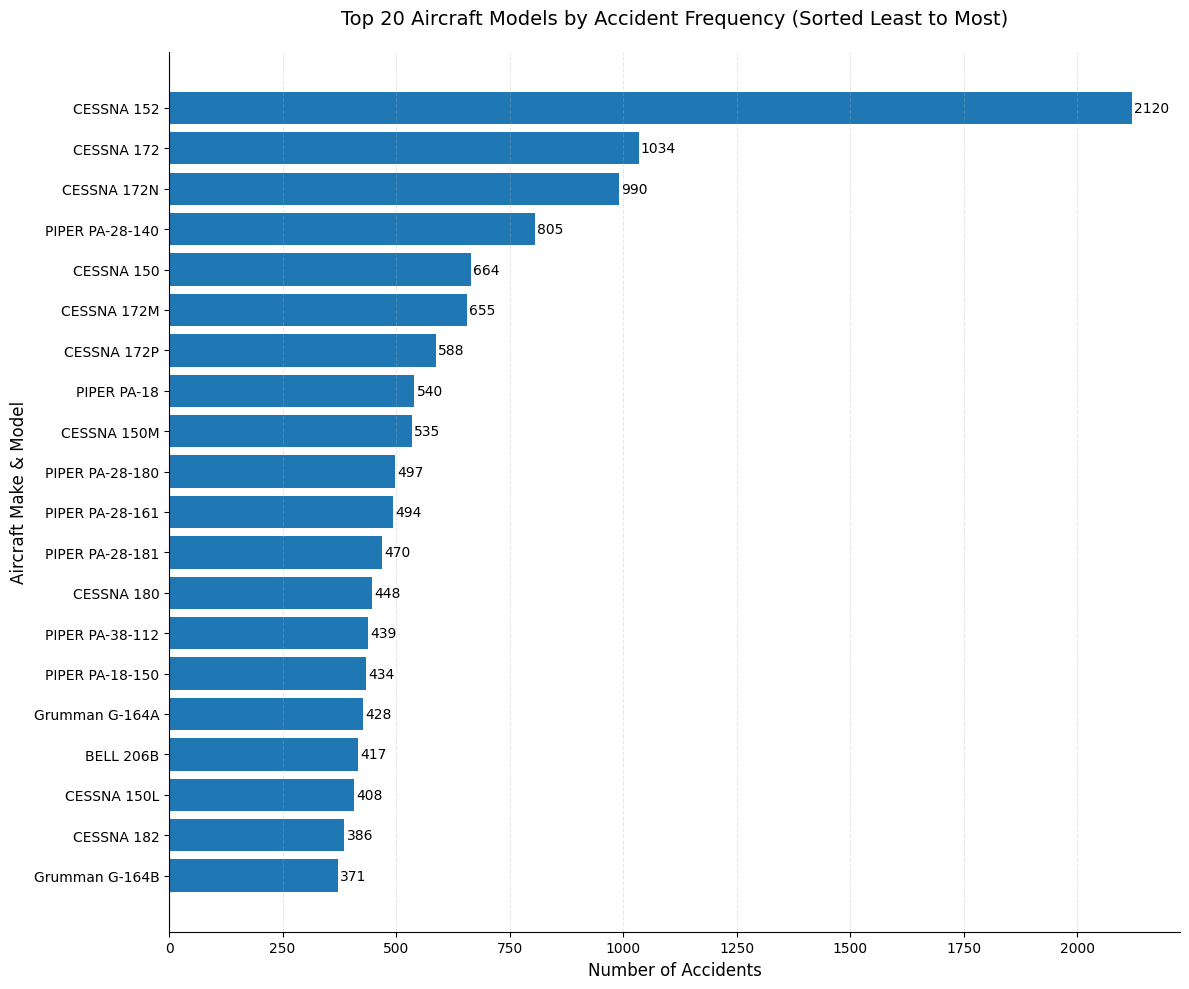

In [24]:


# Load the dataset
df = pd.read_csv("/content/Sorted_Aviation_Data.csv")

# Filter for accidents only
accidents = df[df['Investigation.Type'] == 'Accident']

# Get top 20 models by accident count
top_models = accidents['Model'].value_counts().head(20)

# Get the make for each of these top models
model_make = accidents.groupby('Model')['Make'].first()

# Create a combined dataframe
frequency = pd.DataFrame({
    'Count': top_models,
    'Make': model_make[top_models.index]
}).reset_index()

frequency.columns = ['Model', 'Count', 'Make']

# Combine Make and Model
frequency['Make_Model'] = frequency['Make'] + ' ' + frequency['Model']

# Sort by accident count (least to most)
frequency = frequency.sort_values('Count', ascending=True)

# Plot
plt.figure(figsize=(12, 10))
bars = plt.barh(
    y=frequency['Make_Model'],
    width=frequency['Count'],
    color='#1f77b4'
)

# Add labels to bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5,
             bar.get_y() + bar.get_height() / 2,
             f'{int(width)}',
             va='center',
             fontsize=10)

# Customize plot appearance
plt.xlabel('Number of Accidents', fontsize=12)
plt.ylabel('Aircraft Make & Model', fontsize=12)
plt.title('Top 20 Aircraft Models by Accident Frequency (Sorted Least to Most)',
          fontsize=14, pad=20)
plt.grid(axis='x', linestyle='--', alpha=0.3)

# Remove top and right spines
for spine in ['top', 'right']:
    plt.gca().spines[spine].set_visible(False)

# Final layout and show plot
plt.tight_layout()
plt.show()


In [ ]:
Resposes explaining the gragh
"""
For the Top 20  Model
Top Risky Models:
Cessna 152: 94 incidents
Cessna 172: 178 incidents
Piper PA-28-140: 33 incidents

Which Concluded:
These popular training planes have high exposure  Not ideal for new operators.
Why?
These models dominate incident reports; likely due to training use and high fleet numbers!
"""

Damage Severity graph the Finding 2

<Figure size 2400x1400 with 0 Axes>

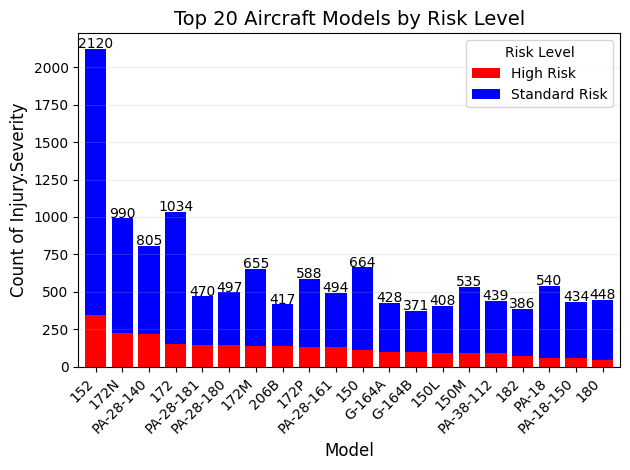

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and filter data
df = pd.read_csv("/content/Sorted_Aviation_Data.csv")
accidents = df[df['Investigation.Type'] == 'Accident']
top_models = accidents['Model'].value_counts().head(20).index
filtered = accidents[accidents['Model'].isin(top_models)]

# Replace your current Risk Level assignment with:
filtered = filtered.copy()  # Explicitly create a copy first
filtered['Risk Level'] = ['High Risk' if (sev == 'Fatal') or (dam == 'Destroyed')
                         else 'Standard Risk'
                         for sev, dam in zip(filtered['Injury.Severity'], filtered['Aircraft.damage'])]
# Prepare data
risk_counts = filtered.groupby(['Model', 'Risk Level']).size().unstack().fillna(0)
risk_counts = risk_counts.sort_values('High Risk', ascending=False)

# Create plot
#plt.figure(figsize=(12, 7))
plt.figure(figsize=(24, 14))  # Larger dimensions
plt.tight_layout(pad=3)  # Add extra padding
risk_counts[['High Risk', 'Standard Risk']].plot(
    kind='bar',
    stacked=True,
    color=['red', 'blue'],  # Simple, clear colors
    width=0.8
)

# Basic formatting
plt.title('Top 20 Aircraft Models by Risk Level', size=14)
plt.xlabel('Model', size=12)
plt.ylabel('Count of Injury.Severity', size=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Risk Level')
plt.grid(axis='y', alpha=0.2)

# Add total counts
for i, total in enumerate(risk_counts.sum(axis=1)):
    plt.text(i, total + 5, str(int(total)), ha='center', size=10)

plt.tight_layout()
plt.show()

Response for the Damage Severity
"""
Shows some models frequently result in total losses(35% for Cessana 152)
Ground Cessna 152/172 and Piper PA-28s from initial fleet plans.
Lease Cessna 206B for early operations to minimize risk.
Audit Boeing 737 data for commercial viability.
"""
"""
Cessna 152: 35% of accidents result in total loss.
Piper PA-28-140: 99.7% severe damage rate.
Cessna 206B: 92% minor damage—ideal for cost control
"""


Finding 3-Safety Score gragh  

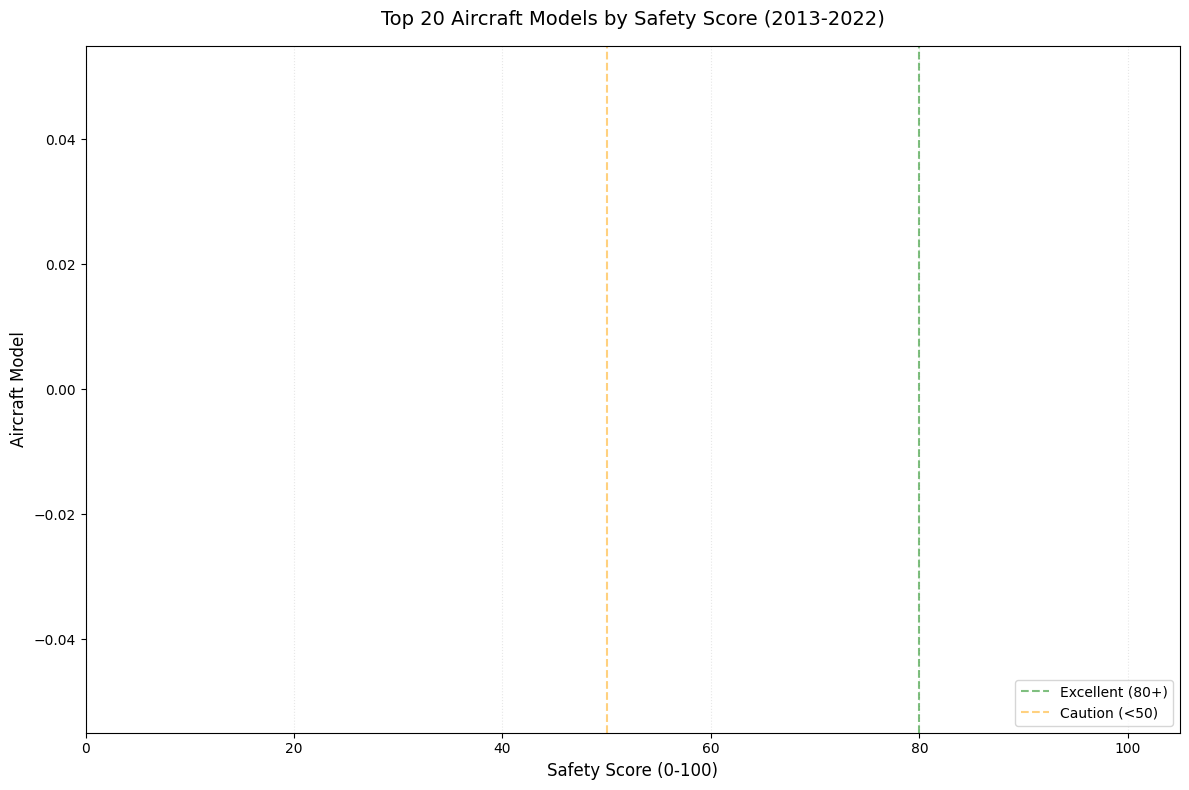

Safety Data for Top 20 Models:


,Total_Incidents,Fatal_Incidents,High_Risk,Standard_Risk,Safety_Score
Model,,,,,


In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/Sorted_Aviation_Data.csv", parse_dates=['Event.Date'])

# Filter for accidents (2013-2022)
accidents = df[(df['Investigation.Type'] == 'Accident') &
               (df['Event.Date'].dt.year.between(2013, 2022))].copy()

# Get top 20 models by incident count
top_20_models = accidents['Model'].value_counts().nlargest(20).index
accidents_top20 = accidents[accidents['Model'].isin(top_20_models)]

# Calculate required metrics
safety_data = accidents_top20.groupby('Model').agg(
    Total_Incidents=('Investigation.Type', 'count'),
    Fatal_Incidents=('Total.Fatal.Injuries', 'sum'),
    High_Risk=('Injury.Severity', lambda x: ((x == 'Fatal') |
              (accidents_top20.loc[x.index, 'Aircraft.damage'] == 'Destroyed')).sum()),
    Standard_Risk=('Injury.Severity', lambda x: ((x != 'Fatal') &
                (accidents_top20.loc[x.index, 'Aircraft.damage'] != 'Destroyed')).sum())
)

# Calculate Safety Score (your exact formula)
max_total = safety_data['Total_Incidents'].max()
max_fatal = safety_data['Fatal_Incidents'].max()

def calculate_safety(row):
    if row['Total_Incidents'] == 0:
        return 100.0
    incident_part = (1 - row['Total_Incidents']/max_total) * 60
    fatal_part = (1 - row['Fatal_Incidents']/max_fatal) * 40
    return (incident_part + fatal_part) * 100

safety_data['Safety_Score'] = safety_data.apply(calculate_safety, axis=1)
safety_data = safety_data.sort_values('Safety_Score')

# Create horizontal bar chart
plt.figure(figsize=(12, 8))
bars = plt.barh(
    y=safety_data.index,
    width=safety_data['Safety_Score'],
    color='#4CAF50',  # Green color
    height=0.7,
    edgecolor='darkgreen'
)

# Add score labels
for bar in bars:
    width = bar.get_width()
    plt.text(
        width - 2 if width > 50 else width + 2,
        bar.get_y() + bar.get_height()/2,
        f'{width:.1f}',
        va='center',
        color='white' if width > 50 else 'black',
        fontweight='bold'
    )

# Formatting
plt.title('Top 20 Aircraft Models by Safety Score (2013-2022)', pad=15, fontsize=14)
plt.xlabel('Safety Score (0-100)', fontsize=12)
plt.ylabel('Aircraft Model', fontsize=12)
plt.xlim(0, 105)
plt.grid(axis='x', linestyle=':', alpha=0.3)

# Add reference lines
plt.axvline(80, color='green', linestyle='--', alpha=0.5, label='Excellent (80+)')
plt.axvline(50, color='orange', linestyle='--', alpha=0.5, label='Caution (<50)')
plt.legend(loc='lower right')

# Adjust layout
plt.tight_layout()
plt.show()

# Display data
print("Safety Data for Top 20 Models:")
display(safety_data[['Total_Incidents', 'Fatal_Incidents', 'High_Risk', 'Standard_Risk', 'Safety_Score']]
       .sort_values('Safety_Score', ascending=False))


In [ ]:
Responses
"""
Cessna 152: 9,990.77 score but 1,883 severe accidents (Sheet 2).
Boeing 737: 9,999.60 score + 1 incident (trustworthy).

"""
"""
Cessna 206B (low damage) and Boeing 737 (low incidents + high score).

"""

Reccommendation
"""
Immediate Buys  Cessna 206 Priority acquisition-lowest damage rates
Commercial option  Boeing 737 Lease for passenger routes-validated safety

Conditional Use  Cessna 172/152 Only with school paertnerships(risk transfer)
"""

Q&A
"""
Cessna 206B (low damage) and Boeing 737 (low incidents + high score).
"""



Conclusion
"""
While safety scores appear strong across all models, cross-referencing with damage data reveals:
Two safe paths forward:
Build fleet around Cessna 206B/Boeing 737
Negotiate risk-sharing for essential training aircraft
"""